In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing important python libraries

In [ ]:
import pandas as pd
import numpy as np

### Reading the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tweets.csv')

In [ ]:
df.shape

(14640, 15)

In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

### Selecting 'text' and 'airline_sentiment' columns and ignoring the rest

In [ ]:
data = df[['text', 'airline_sentiment']]

In [ ]:
data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


### Visualizing the 'negative', 'positive' and 'neutral' data

In [ ]:
data["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

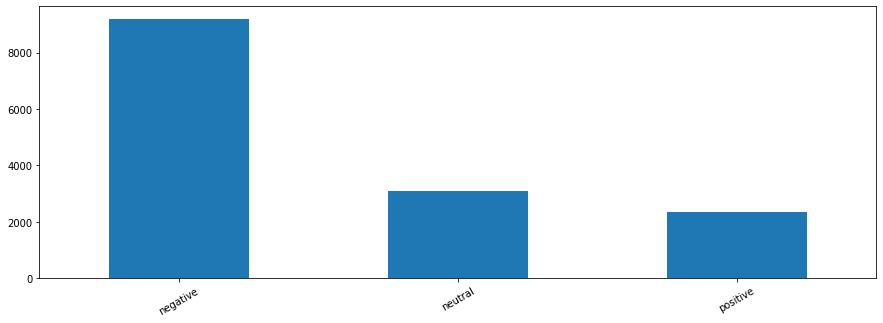

In [ ]:
data["airline_sentiment"].value_counts().sort_index().plot.bar(figsize=(15,5), rot=30)

## Text cleaning

In [ ]:
data["text"]

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [ ]:
data['text'].values

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

### Removing all characters except alphanumeric

In [ ]:
import re
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data['text']

0                         VirginAmerica What dhepburn said
1        VirginAmerica plus youve added commercials to ...
2        VirginAmerica I didnt today Must mean I need t...
3        VirginAmerica its really aggressive to blast o...
4        VirginAmerica and its a really big bad thing a...
                               ...                        
14635    AmericanAir thank you we got on a different fl...
14636    AmericanAir leaving over 20 minutes Late Fligh...
14637    AmericanAir Please bring American Airlines to ...
14638    AmericanAir you have my money you change my fl...
14639    AmericanAir we have 8 ppl so we need 2 know ho...
Name: text, Length: 14640, dtype: object

### Transforming all text to lower case

In [ ]:
data['text'].apply(lambda x: x.lower())

0                         virginamerica what dhepburn said
1        virginamerica plus youve added commercials to ...
2        virginamerica i didnt today must mean i need t...
3        virginamerica its really aggressive to blast o...
4        virginamerica and its a really big bad thing a...
                               ...                        
14635    americanair thank you we got on a different fl...
14636    americanair leaving over 20 minutes late fligh...
14637    americanair please bring american airlines to ...
14638    americanair you have my money you change my fl...
14639    americanair we have 8 ppl so we need 2 know ho...
Name: text, Length: 14640, dtype: object

### Tokenizing text

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['text'].values)

### Padding text vector so they have the same length

In [ ]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X) 

In [ ]:
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   78,   57,  218],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   78,  540,  541, 1122, 2459,    1,    2,  197],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   78,
           3,  185,   98,  775,  565,    3,   75,    1,  148,  143,  191],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   78,   64,  132, 3670,    1, 4604,
        4605,  981,   15,   21, 3098, 3671,   61,   54,   22,  488, 2723],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   

## Building the LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, Embedding 

In [ ]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 33, 256)           1280000   
                                                                 
 lstm_8 (LSTM)               (None, 33, 256)           525312    
                                                                 
 lstm_9 (LSTM)               (None, 33, 128)           197120    
                                                                 
 lstm_10 (LSTM)              (None, 33, 128)           131584    
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,265,987
Trainable params: 2,265,987
No

### Converting categorical variable into dummy/indicator variables

In [ ]:
y = pd.get_dummies(data['airline_sentiment']).values
[print(data['airline_sentiment'][i], y[i]) for i in range(0,5)]

neutral [0 1 0]
positive [0 0 1]
neutral [0 1 0]
negative [1 0 0]
negative [1 0 0]


[None, None, None, None, None]

### Splitting the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the model

In [ ]:
batch_size = 32
epochs = 10

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
366/366 [==============================] - 88s 241ms/step - loss: 0.5365 - accuracy: 0.7879
Epoch 2/10
366/366 [==============================] - 89s 243ms/step - loss: 0.4031 - accuracy: 0.8504
Epoch 3/10
366/366 [==============================] - 88s 241ms/step - loss: 0.3112 - accuracy: 0.8847
Epoch 4/10
366/366 [==============================] - 88s 240ms/step - loss: 0.2554 - accuracy: 0.9086
Epoch 5/10
366/366 [==============================] - 88s 240ms/step - loss: 0.1993 - accuracy: 0.9303
Epoch 6/10
366/366 [==============================] - 88s 240ms/step - loss: 0.1636 - accuracy: 0.9435
Epoch 7/10
366/366 [==============================] - 88s 241ms/step - loss: 0.1454 - accuracy: 0.9508
Epoch 8/10
366/366 [==============================] - 88s 240ms/step - loss: 0.1181 - accuracy: 0.9606
Epoch 9/10
366/366 [==============================] - 88s 239ms/step - loss: 0.1008 - accuracy: 0.9674
Epoch 10/10
366/366 [==============================] - 88s 241ms/step - l

### Visualizing the training results

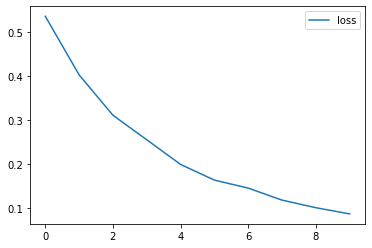

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

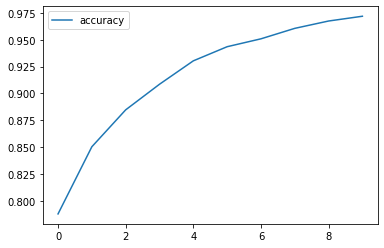

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

## Testing the model on the test data

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predicted_positive, predicted_neutral, predicted_negative = 0, 0, 0
real_positive, real_neutral, real_negative = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        predicted_positive += 1
    elif np.argmax(prediction)==1:
        predicted_neutral += 1
    else:
        predicted_negative += 1
    
    if np.argmax(y_test[i])==2:
        real_positive += 1
    elif np.argmax(y_test[i])==1:    
        real_neutral += 1
    else:
        real_negative +=1

print('Positive predictions:', predicted_positive)
print('Neutral predictions:', predicted_neutral)
print('Negative predictions:', predicted_negative)
print('Real positive:', real_positive)
print('Real neutral:', real_neutral)
print('Real negative:', real_negative)

Positive predictions: 465
Neutral predictions: 590
Negative predictions: 1873
Real positive: 444
Real neutral: 614
Real negative: 1870
